In [1]:
import sys
import os
import random
from collections import Counter
import numpy as np
# Package
import somhos.resources.dataset as rd
import somhos.resources.queries as rq
from somhos.methods.useful import save_pickle, load_pickle
from somhos.config.paths import *

Default path

In [2]:
data_path = "../../src/somhos/resources/aminer/v9gamma"

Load samples

In [3]:
# Load sample A
docs_sample_a_path = get_relative_path(data_path, DOCS_SAMPLE_A_SUFFIX)
docs_sample_a = load_pickle(docs_sample_a_path)
# Load sample B
docs_sample_b_path = get_relative_path(data_path, DOCS_SAMPLE_B_SUFFIX)
docs_sample_b = load_pickle(docs_sample_b_path)

print("Samples size: (%d, %d)" % (len(docs_sample_a), len(docs_sample_b)))

Samples size: (5000, 5000)


Load samples content

In [4]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 10000


Load Jaccard similarities

In [5]:
docs_samples_jaccard_sim_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM)
m_jaccard_sim = load_pickle(docs_samples_jaccard_sim_path)
print(m_jaccard_sim)

docs_samples_jaccard_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV)
m_udv_jaccard_sim = load_pickle(docs_samples_jaccard_sim_udv_path)
print(m_udv_jaccard_sim)

[[0.03472222 0.0174216  0.02105263 ... 0.03184713 0.01798561 0.04268293]
 [0.04216867 0.0308642  0.02469136 ... 0.04736842 0.02597403 0.05853659]
 [0.02857143 0.         0.03007519 ... 0.00591716 0.0078125  0.03867403]
 ...
 [0.02739726 0.03597122 0.0141844  ... 0.03529412 0.02272727 0.02645503]
 [0.0308642  0.01257862 0.01910828 ... 0.02659574 0.02013423 0.02427184]
 [0.03496503 0.0070922  0.01438849 ... 0.06097561 0.03100775 0.0212766 ]]
[[0.03389149 0.01443577 0.0261616  ... 0.03203783 0.02327397 0.03159588]
 [0.03742246 0.01593975 0.02888723 ... 0.03537568 0.02569875 0.03488768]
 [0.0201368  0.00857708 0.01554404 ... 0.01903544 0.01382834 0.01877285]
 ...
 [0.04150054 0.01767677 0.03203519 ... 0.03923071 0.02849925 0.03868954]
 [0.03186418 0.01357225 0.02459667 ... 0.0301214  0.02188178 0.02970589]
 [0.04029545 0.01716348 0.03110496 ... 0.03809153 0.0276717  0.03756607]]


Load jaccard similarities with keyphrases

In [6]:
docs_samples_jaccard_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_KPS)
m_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_kps_path)
print(m_jaccard_sim_kps)

docs_samples_jaccard_sim_udv_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV_KPS)
m_udv_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_udv_kps_path)
print(m_udv_jaccard_sim_kps)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02631579 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02439024 0.         0.        ]]
[[9.89092281e-04 4.85534230e-04 1.62718086e-03 ... 2.07293709e-03
  3.38306208e-04 1.29827380e-03]
 [2.21332913e-03 1.08649827e-03 3.64120402e-03 ... 4.63868956e-03
  7.57040572e-04 2.90519628e-03]
 [1.75591496e-04 8.61958823e-05 2.88870034e-04 ... 3.68004211e-04
  6.00587977e-05 2.30479848e-04]
 ...
 [2.14650524e-04 1.05369518e-04 3.53127034e-04 ... 4.49864022e-04
  7.34184325e-05 2.81748383e-04]
 [3.15118049e-03 1.54687891e-03 5.18408713e-03 ... 6.60423604e-03
  1.07782048e-03 4.13621169e-03]
 [1.81206654e-03 8.89522999e-04 2.98107673e-03 ... 3.797

Load cosine similarity with vectors of TF-IDF

In [7]:
docs_samples_tf_idf_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF)
m_tf_idf = load_pickle(docs_samples_tf_idf_path)
print(m_tf_idf)

docs_samples_tf_idf_udv_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_UDV)
m_udv_tf_idf = load_pickle(docs_samples_tf_idf_udv_path)
print(m_udv_tf_idf)

[[0.01075387 0.00206247 0.00420691 ... 0.00566958 0.00147329 0.0079679 ]
 [0.00313217 0.01103955 0.01155472 ... 0.01543637 0.00282845 0.00718103]
 [0.00373985 0.         0.00749853 ... 0.00558708 0.00154656 0.02780748]
 ...
 [0.00126982 0.02567926 0.00055769 ... 0.00533172 0.00415633 0.00597354]
 [0.00616515 0.00312923 0.00174796 ... 0.00822055 0.00276756 0.02864621]
 [0.00437217 0.00440589 0.00088447 ... 0.01827149 0.00584807 0.00173718]]
[[0.00765054 0.00453286 0.00640747 ... 0.01133526 0.00653855 0.00849204]
 [0.00719062 0.00426036 0.00602228 ... 0.01065382 0.00614548 0.00798153]
 [0.00608192 0.00360347 0.00509372 ... 0.00901114 0.00519793 0.00675088]
 ...
 [0.00965801 0.00572227 0.00808876 ... 0.01430958 0.00825424 0.01072031]
 [0.00893104 0.00529154 0.00747991 ... 0.01323248 0.00763293 0.00991338]
 [0.01137832 0.00674153 0.00952955 ... 0.01685842 0.0097245  0.01262983]]


Load cosine similarities with TF-IDF vectors from keyphrases 

In [8]:
docs_samples_tf_idf_kps_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_KPS)
m_tf_idf_kps = load_pickle(docs_samples_tf_idf_kps_path)
print(m_tf_idf_kps)

docs_samples_tf_idf_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_UDV_KPS)
m_udv_tf_idf_kps = load_pickle(docs_samples_tf_idf_kps_udv_path)
print(m_udv_tf_idf_kps)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00350385 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00314453 0.         0.        ]]
[[0.00062952 0.00072345 0.00349406 ... 0.00210431 0.00073329 0.00148477]
 [0.00043288 0.00049747 0.00240263 ... 0.001447   0.00050423 0.00102098]
 [0.00010388 0.00011938 0.00057656 ... 0.00034724 0.000121   0.000245  ]
 ...
 [0.00012329 0.00014168 0.00068428 ... 0.00041211 0.00014361 0.00029078]
 [0.00089562 0.00102925 0.00497097 ... 0.00299379 0.00104325 0.00211237]
 [0.00024734 0.00028425 0.00137284 ... 0.0008268  0.00028811 0.00058338]]


Load cosine similarity with centroids of word2vec

In [9]:
docs_samples_word2vec_sim_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM)
m_word2vec_sim = load_pickle(docs_samples_word2vec_sim_path)
print(m_word2vec_sim)

docs_samples_word2vec_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_UDV)
m_udv_word2vec_sim = load_pickle(docs_samples_word2vec_sim_udv_path)
print(m_udv_word2vec_sim)

[[0.85457032 0.76439463 0.79155265 ... 0.8088368  0.76935862 0.8377027 ]
 [0.83597968 0.77741533 0.72474716 ... 0.85471003 0.78843886 0.75208273]
 [0.73758383 0.70874797 0.67737473 ... 0.72717386 0.70482656 0.7638605 ]
 ...
 [0.83541201 0.8386872  0.71838643 ... 0.80204947 0.83352037 0.76898583]
 [0.83616432 0.82673341 0.73442807 ... 0.86542173 0.78982102 0.77871454]
 [0.83048901 0.8211685  0.74389879 ... 0.864918   0.81549967 0.81777544]]
[[0.82892786 0.77719529 0.76529965 ... 0.81525781 0.77951582 0.80459596]
 [0.82982015 0.77803189 0.76612344 ... 0.81613538 0.78035491 0.80546205]
 [0.76093491 0.71344571 0.70252581 ... 0.74838615 0.7155759  0.73859883]
 ...
 [0.8211906  0.7699409  0.75815629 ... 0.80764814 0.77223977 0.79708581]
 [0.84356335 0.7909174  0.77881172 ... 0.82965195 0.79327889 0.81880185]
 [0.83983896 0.78742544 0.77537322 ... 0.82598897 0.78977651 0.81518678]]


In [10]:
docs_samples_word2vec_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_KPS)
m_word2vec_sim_kps = load_pickle(docs_samples_word2vec_sim_kps_path)
print(m_word2vec_sim_kps)

docs_samples_word2vec_sim_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_UDV_KPS)
m_udv_word2vec_sim_kps = load_pickle(docs_samples_word2vec_sim_kps_udv_path)
print(m_udv_word2vec_sim_kps)

[[0.59941519 0.55470327 0.43061113 ... 0.62401874 0.42920045 0.59120494]
 [0.60925314 0.56669532 0.47241645 ... 0.71085392 0.59293892 0.51076994]
 [0.45249799 0.43012126 0.41202952 ... 0.49928811 0.45999924 0.45372825]
 ...
 [0.71048871 0.64416613 0.48523162 ... 0.65125671 0.6224604  0.60824139]
 [0.6964594  0.63334227 0.43874686 ... 0.72537404 0.55560171 0.62522677]
 [0.69810397 0.6918212  0.53824229 ... 0.71049728 0.62089338 0.65411763]]
[[0.56327034 0.50936044 0.42587916 ... 0.57711881 0.47450445 0.52818554]
 [0.64564009 0.58384668 0.48815753 ... 0.66151368 0.54389352 0.60542466]
 [0.51288639 0.46379867 0.3877847  ... 0.52549612 0.43206051 0.48093988]
 ...
 [0.66195384 0.59859907 0.50049208 ... 0.67822852 0.55763639 0.62072227]
 [0.67309706 0.60867578 0.50891728 ... 0.6896457  0.56702354 0.6311714 ]
 [0.69570252 0.6291177  0.52600888 ... 0.71280694 0.58606661 0.65236882]]


In [11]:
docs_samples_word2vec_tfidf_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF)
m_word2vec_tfidf = load_pickle(docs_samples_word2vec_tfidf_path)
print(m_word2vec_tfidf)

docs_samples_word2vec_tfidf_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_UDV)
m_udv_word2vec_tfidf = load_pickle(docs_samples_word2vec_tfidf_udv_path)
print(m_udv_word2vec_tfidf)

[[0.65026507 0.6352724  0.51125832 ... 0.70741633 0.53963897 0.63119034]
 [0.5617378  0.55335334 0.48273909 ... 0.61529872 0.60382952 0.46528783]
 [0.57255337 0.65461743 0.51519611 ... 0.66796163 0.57828285 0.62439063]
 ...
 [0.69814095 0.75335527 0.57345115 ... 0.66531861 0.70799736 0.64402167]
 [0.66652319 0.7462082  0.56672043 ... 0.72681021 0.63652852 0.61732316]
 [0.59589472 0.67401673 0.56727652 ... 0.68569787 0.6261404  0.58359683]]
[[0.61990874 0.62639939 0.56540104 ... 0.64824639 0.58447769 0.61927054]
 [0.56964466 0.57560903 0.51955661 ... 0.59568461 0.53708647 0.56905821]
 [0.63615771 0.64281849 0.58022126 ... 0.66523814 0.59979795 0.63550278]
 ...
 [0.65475146 0.66160692 0.59718008 ... 0.68468186 0.61732897 0.65407738]
 [0.68577773 0.69295805 0.62547826 ... 0.71712642 0.64658193 0.68507171]
 [0.6174545  0.62391945 0.5631626  ... 0.64567996 0.58216373 0.61681882]]


In [12]:
docs_samples_word2vec_tfidf_kps_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_KPS)
m_word2vec_tfidf_kps = load_pickle(docs_samples_word2vec_tfidf_kps_path)
print(m_word2vec_tfidf_kps)

docs_samples_word2vec_tfidf_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_UDV_KPS)
m_udv_word2vec_tfidf_kps = load_pickle(docs_samples_word2vec_tfidf_kps_udv_path)
print(m_udv_word2vec_tfidf_kps)

[[0.4308252  0.46092489 0.25156474 ... 0.53535328 0.33720741 0.43388834]
 [0.4332573  0.47743951 0.37647243 ... 0.55057405 0.55530767 0.36347259]
 [0.3466539  0.38661425 0.33447691 ... 0.41947611 0.42869596 0.39422269]
 ...
 [0.41816378 0.4478462  0.348465   ... 0.46241594 0.47159042 0.44217885]
 [0.50347543 0.57928714 0.33142323 ... 0.61184987 0.51755772 0.51304573]
 [0.44150739 0.54036326 0.43194542 ... 0.52334593 0.5163729  0.45019183]]
[[0.38512844 0.41505043 0.31852407 ... 0.44523561 0.39519693 0.40710229]
 [0.44736451 0.48212184 0.36999699 ... 0.51718488 0.45906005 0.47288929]
 [0.3906337  0.42098341 0.32307724 ... 0.45160007 0.40084612 0.41292166]
 ...
 [0.38580905 0.41578391 0.31908697 ... 0.44602243 0.39589533 0.40782173]
 [0.50702332 0.54641575 0.41933837 ... 0.58615467 0.52027854 0.53595199]
 [0.46365498 0.49967797 0.38347017 ... 0.53601781 0.47577641 0.49010923]]


Means to order matrices

In [13]:
# m_ref = m_jaccard_sim
# m_ref_udv = m_udv_jaccard_sim

# m_ref = m_jaccard_sim_kps
# m_ref_name = "sim_{bok}(d_i, d_j)"

# m_ref = m_tf_idf_kps
# m_ref = m_word2vec_sim
# m_ref = m_word2vec_sim_kps
# m_ref = m_word2vec_tfidf

m_ref = m_word2vec_tfidf_kps
m_ref_name = "sim_{tk}(d_i, d_j)"

# m_ref_udv = m_udv_word2vec_sim_kps

# Means sample a
means_sample_a = np.divide(np.sum(m_ref, axis=1), len(docs_sample_b))
# Means sample b
means_sample_b = np.divide(np.sum(m_ref, axis=0), len(docs_sample_a))
# Ordered means
ordered_indices_m = means_sample_a.argsort()[::-1]
ordered_indices_n = means_sample_b.argsort()[::-1]

docs_sample_a = list(np.array(docs_sample_a)[ordered_indices_m])
docs_sample_b = list(np.array(docs_sample_b)[ordered_indices_n])

Order matrices by means

In [14]:
m_ref = m_ref[ordered_indices_m,:][:,ordered_indices_n]
# m_ref_udv = m_ref_udv[ordered_indices_m,:][:,ordered_indices_n]

m_jaccard_sim = m_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim = m_udv_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_jaccard_sim_kps = m_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim_kps = m_udv_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
# TF-IDF 
m_tf_idf = m_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_udv_tf_idf = m_udv_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_tf_idf_kps = m_tf_idf_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_tf_idf_kps = m_udv_tf_idf_kps[ordered_indices_m,:][:,ordered_indices_n]
# Word2vec
m_word2vec_sim = m_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_sim = m_udv_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]
m_word2vec_sim_kps = m_word2vec_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_sim_kps = m_udv_word2vec_sim_kps[ordered_indices_m,:][:,ordered_indices_n]

m_word2vec_tfidf = m_word2vec_tfidf[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_tfidf = m_udv_word2vec_tfidf[ordered_indices_m,:][:,ordered_indices_n]
m_word2vec_tfidf_kps = m_word2vec_tfidf_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_tfidf_kps = m_udv_word2vec_tfidf_kps[ordered_indices_m,:][:,ordered_indices_n]

In [15]:
matrices = [
    (m_jaccard_sim, "Jaccard similarities", "$sim_{bow}(d_i, d_j)$"),
    # (m_udv_jaccard_sim, "Jaccard similarities UDV'"),
    (m_jaccard_sim_kps, "Jaccard similarities (keyphrases)", "$sim_{bok}(d_i, d_j)$"),
    # (m_udv_jaccard_sim_kps, "Jaccard similarities UDV' (keyphrases)"),
    # (m_tf_idf, "TF-IDF"),
    # (m_udv_tf_idf, "TF-IDF UDV'"),
    # (m_tf_idf_kps, "TF-IDF (Keyphrases)"),
    # (m_udv_tf_idf_kps, "TF-IDF UDV' (Keyphrases)"),
    (m_word2vec_sim, "Word2vec similarities", "$sim_{qw}(d_i, d_j)$"),
    # (m_udv_word2vec_sim, "Word2vec similarities UDV'"),
    (m_word2vec_sim_kps, "Word2vec similarities (keyphrases)", "$sim_{qk}(d_i, d_j)$"),
    # (m_udv_word2vec_sim_kps, "Word2vec similarities UDV' (keyphrases)"),
    (m_word2vec_tfidf, "Word2vec similarities TF-IDF", "$sim_{tw}(d_i, d_j)$"),
    # (m_udv_word2vec_tfidf_kps, "Word2vec similarities TF-IDF UDV'"),
    (m_word2vec_tfidf_kps, "Word2vec similarities TF-IDF(keyphrases)", "$sim_{tk}(d_i, d_j)$")
    # (m_udv_word2vec_tfidf_kps, "Word2vec similarities TF-IDF UDV' (keyphrases)")
]

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['image.interpolation'] = 'none'
mpl.rcParams['image.lut'] = 2
mpl.rcParams['image.resample'] = False

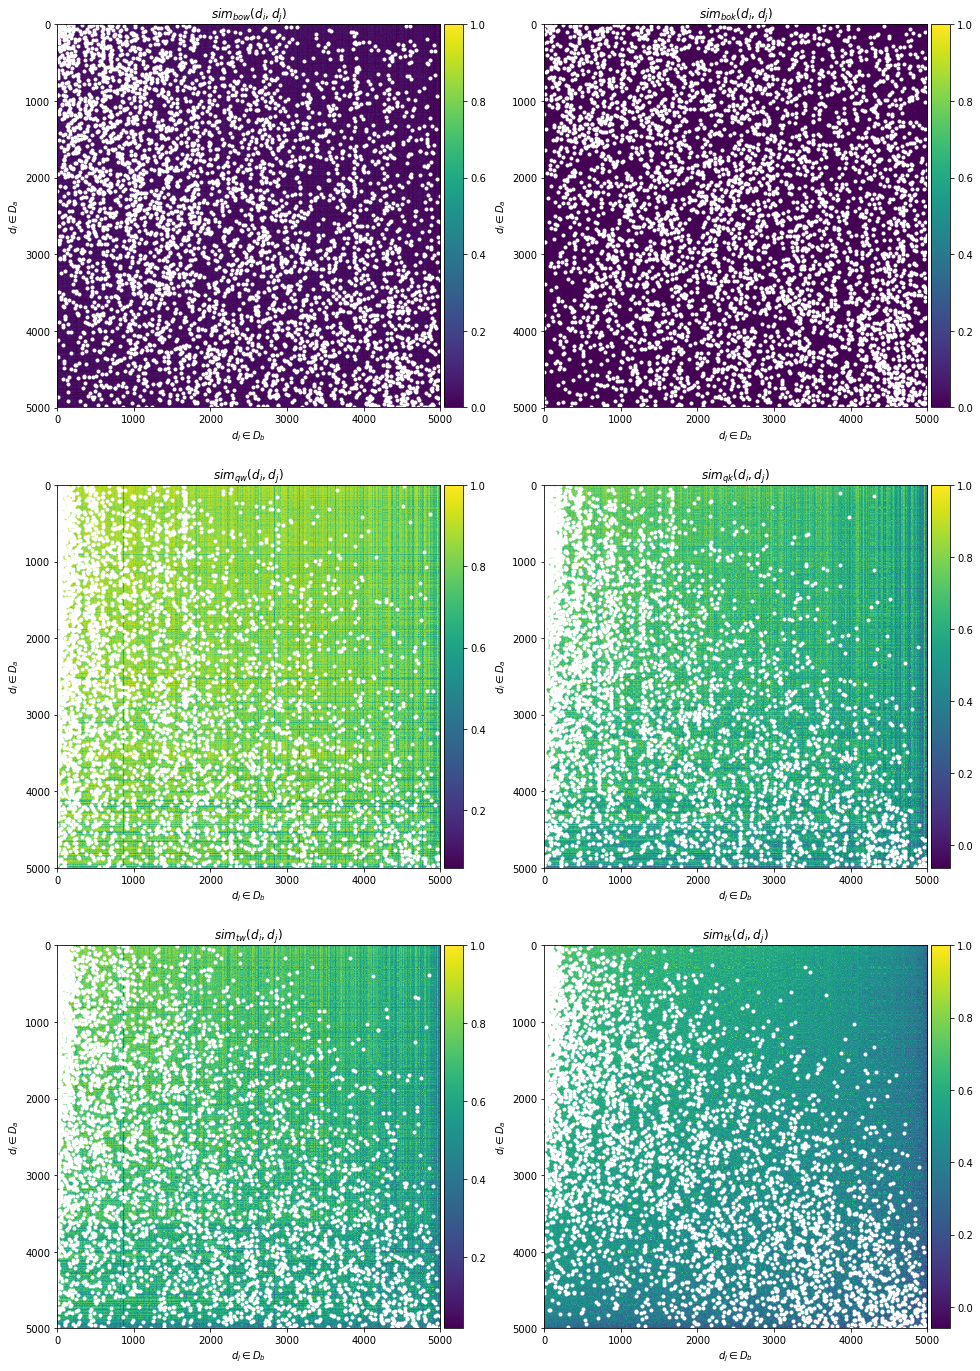

In [17]:
nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 24))
# fig.suptitle("Matrices")

matrices_iter = iter(matrices)
for pos_x in range(0, nrows):
    for pos_y in range(0, ncols):
        matrix, title, title2 = next(matrices_iter)
        data = matrix
        axes[pos_x][pos_y].set_title(title2)
        # plt.colorbar(im_m, ax=axes[pos_x][pos_y])
        axes[pos_x][pos_y].set_xlabel(r'$d_j \in D_b$')
        axes[pos_x][pos_y].set_ylabel(r'$d_i \in D_a$')
        # data 
        im_m = axes[pos_x][pos_y].imshow(data)
        x, y = range(0, data.shape[0]), data.argmax(1)
        # x = 50
        # y = 400
        # iswap x, y for image 
        axes[pos_x][pos_y].plot(y, x, 'w.')
        # Divider
        divider = make_axes_locatable(axes[pos_x][pos_y])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        # Colorbar
        fig.colorbar(im_m, cax=cax, orientation='vertical')
# l b w h 
# cax = plt.axes([0.98, 0.1, 0.05, 0.8])
# plt.colorbar(im_jaccard_sim, cax=cax)
plt.show()

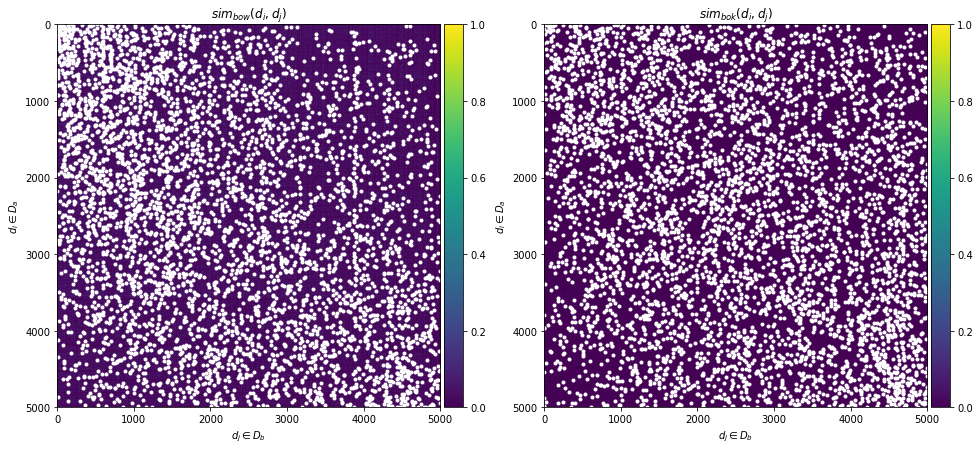

In [18]:
nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# fig.suptitle("")

matrices_iter = iter(matrices)
for pos_x in range(0, nrows):
    for pos_y in range(0, ncols):
        #if pos_x < 2:
        #    next(matrices_iter)
        #    continue
        if pos_x > 0:
            break
        matrix, title, title2 = next(matrices_iter)
        data = matrix
        axes[pos_y].set_title(title2)
        # plt.colorbar(im_m, ax=axes[pos_x][pos_y])
        axes[pos_y].set_xlabel(r'$d_j \in D_b$')
        axes[pos_y].set_ylabel(r'$d_i \in D_a$')
        # data 
        im_m = axes[pos_y].imshow(data)
        x, y = range(0, data.shape[0]), data.argmax(1)
        # x = 50
        # y = 400
        # iswap x, y for image 
        axes[pos_y].plot(y, x, 'w.')
        # Divider
        divider = make_axes_locatable(axes[pos_y])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        # Colorbar
        fig.colorbar(im_m, cax=cax, orientation='vertical')
# l b w h 
# cax = plt.axes([0.98, 0.1, 0.05, 0.8])
# plt.colorbar(im_jaccard_sim, cax=cax)
plt.show()

In [19]:
mmm = np.array([
    [1, 2, 3],
    [5, 7, 9],
    [12, 15, 18]]
)

nnn = np.array([
    [30, 25, 20],
    [16, 12, 8],
    [6, 3, 0]]
)

def mean(X):
    EX = X.mean(1)
    return EX 

def subtract(X):
    EX = mean(X)
    subtract_X = np.subtract(X.transpose(), EX).transpose()
    return subtract_X

def sigma(X):
    subtract_X = subtract(X)
    sum_EX_EX = np.sum(subtract_X**2, 1)
    sigma_X = np.sqrt(np.divide(sum_EX_EX, (X.shape[1] - 1)))
    return sigma_X

def cov(X, Y):
    subtract_X = subtract(X)
    subtract_Y = subtract(Y)
    cov_XY = np.sum((subtract_X)*(subtract_Y), 1)/X.shape[0]
    return cov_XY

def pearson(X, Y):
    cov_XY = cov(X, Y)
    sigma_X = sigma(X)
    sigma_Y = sigma(Y)
    # p = np.array([((cxy/(sigma_X*sigma_Y)[i]) if (sigma_X*sigma_Y)[i] != 0 else float('inf') ) for i, cxy in enumerate(cov_XY)])
    # if cov is zero X Y Are uncorrelated
    p = np.array([((cxy/(sigma_X*sigma_Y)[i]) if cxy else 0.0) for i, cxy in enumerate(cov_XY)])
    return p

print(cov(mmm, nnn), pearson(mmm, nnn))

[-3.33333333 -5.33333333 -6.        ] [-0.66666667 -0.66666667 -0.66666667]


Jaccard similarities
Jaccard similarities (keyphrases)
Word2vec similarities
Word2vec similarities (keyphrases)
Word2vec similarities TF-IDF
Word2vec similarities TF-IDF(keyphrases)


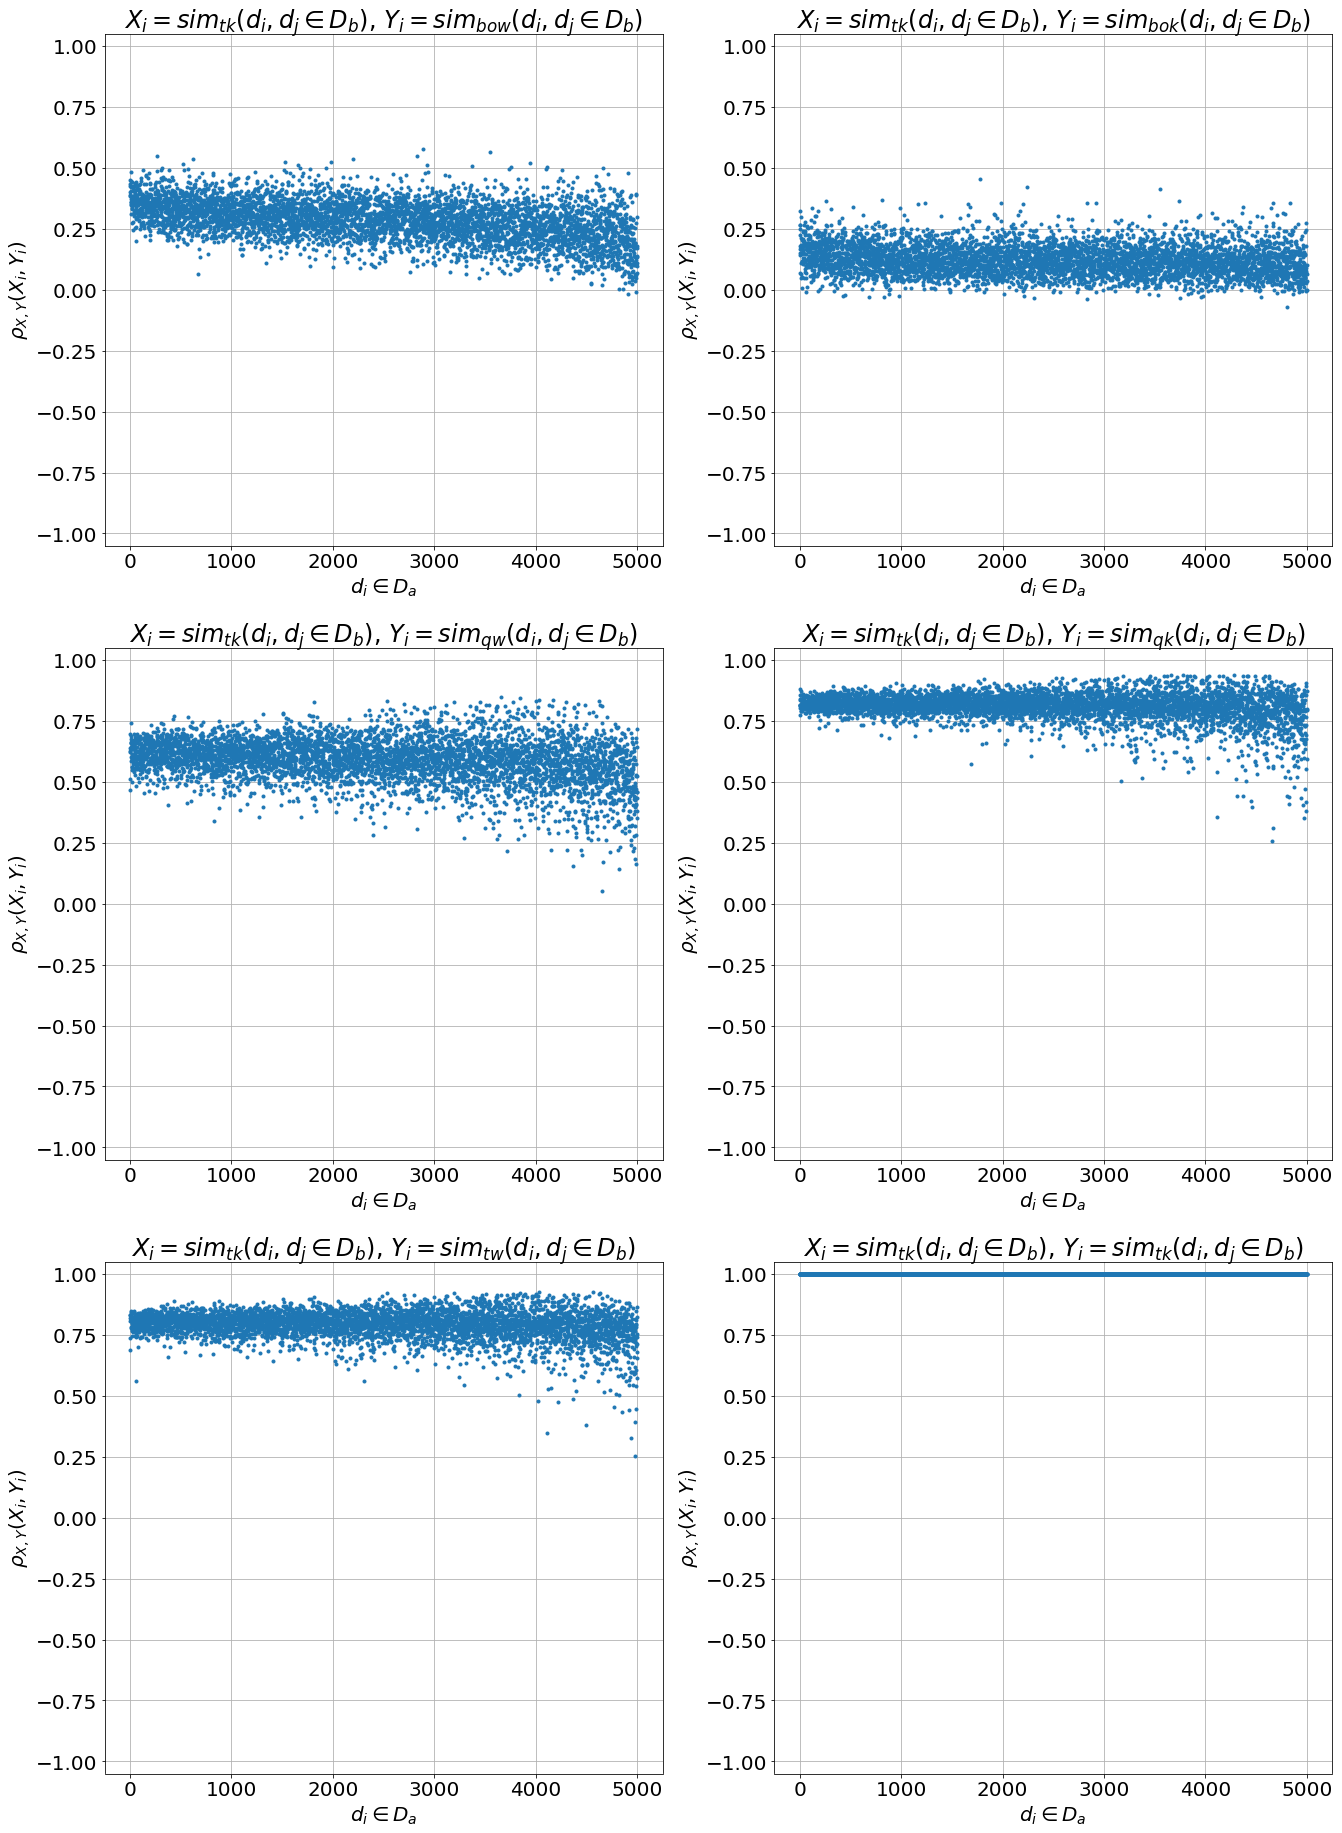

In [26]:
nrows = 3
ncols = 2

mpl.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 32))
# fig.suptitle("Stats")

X = m_ref 
matrices_iter = iter(matrices)
for i in range(0, nrows):
    for j in range(0, ncols):
        matrix, title, title2 = next(matrices_iter)
        Y = matrix
        # data
        # axes[i][j].plot(cov(X, Y), '.')
        axes[i][j].plot(pearson(X, Y), '.')
        axes[i][j].set_ylim([-1.05, 1.05])
        print(title)
        axes[i][j].set_title(r'$X_i = ' + m_ref_name.replace("d_j", "d_j \in D_b") + r'$, $Y_i = ' + title2.replace(r"$", "").replace("d_j", "d_j \in D_b") + r'$' )
        axes[i][j].set_xlabel(r'$d_i \in D_a$')
        axes[i][j].set_ylabel(r'$\rho_{X, Y}(X_i, Y_i)$')
        # axes[i][j].set_ylabel(r'$\rho_{X, Y}(' + m_ref_name + ', ' + title2.replace(r"$", "") +')$')
        axes[i][j].grid(True)
plt.show()

Get content

Order docs and get less similar